### Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
import math 

### Loading Data

In [6]:
heart_disease=pd.read_csv("D:\machine learning\Projects\Heart Disease\data\heart_disease_df_1.csv")

### EDA

In [7]:
print('Shape of Data is :')
heart_disease.shape

Shape of Data is :


(1076, 14)

In [8]:
print('Info about Data')
heart_disease.info()

Info about Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1076 non-null   int64  
 1   sex       1076 non-null   int64  
 2   cp        1023 non-null   float64
 3   trestbps  1076 non-null   int64  
 4   chol      1021 non-null   float64
 5   fbs       1076 non-null   int64  
 6   restecg   1028 non-null   float64
 7   thalach   1076 non-null   int64  
 8   exang     1076 non-null   int64  
 9   oldpeak   0 non-null      float64
 10  slope     1076 non-null   int64  
 11  ca        1076 non-null   int64  
 12  thal      1076 non-null   int64  
 13  target    1076 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 117.8 KB


In [9]:
print('Describtion of data :')
heart_disease.describe()

Describtion of data :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1076.000000,1076.000000,1023.000000,1076.000000,1021.000000,1076.000000,1028.000000,1076.000000,1076.000000,0.0,1076.000000,1076.000000,1076.000000,1076.000000
mean,54.548327,0.690520,0.947214,131.752788,245.537708,0.148699,0.527237,149.152416,0.331784,NaN,1.385688,0.762082,2.328996,0.512082
std,9.002247,0.462494,1.024719,17.471844,50.346192,0.355957,0.527932,22.813766,0.471073,NaN,0.618279,1.034787,0.617222,0.500086
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,NaN,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,NaN,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,NaN,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,NaN,2.000000,4.000000,3.000000,1.000000


In [10]:
heart_disease.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212.0,0,1.0,168,0,NaN,2,2,3,0
1,53,1,0.0,140,203.0,1,0.0,155,1,NaN,0,0,3,0
2,70,1,0.0,145,174.0,0,1.0,125,1,NaN,0,0,3,0
3,61,1,0.0,148,203.0,0,1.0,161,0,NaN,2,1,3,0
4,62,0,0.0,138,294.0,1,1.0,106,0,NaN,1,3,2,0


In [12]:
# balance of data
for col in heart_disease:
    value_counts=heart_disease[col].value_counts()
    print(f'{ value_counts}:')

age
58    72
57    60
54    57
59    48
52    46
51    42
60    40
62    40
56    40
44    37
64    35
61    34
41    34
63    33
67    32
55    31
65    30
53    27
66    27
42    26
45    26
43    26
48    25
46    24
50    23
47    18
49    17
35    15
70    14
39    14
68    13
38    12
71    11
69    11
40    11
34     6
37     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64:
sex
1    743
0    333
Name: count, dtype: int64:
cp
0.0    491
2.0    289
1.0    169
3.0     74
Name: count, dtype: int64:
trestbps
120    134
130    128
140    117
110     65
150     57
138     49
128     41
125     40
160     37
112     32
132     30
118     25
124     21
135     21
108     21
134     19
152     18
145     17
170     16
122     14
100     14
126     12
136     12
180     10
105     10
142      9
146      9
115      9
148      7
94       7
178      7
102      6
144      6
200      5
172      4
114      4
123      4
165      4
154      4
117      4
106      3
104      3
129   

In [13]:
heart_disease['sex'].value_counts()

sex
1    743
0    333
Name: count, dtype: int64

In [14]:
heart_disease['target'].value_counts()

target
1    551
0    525
Name: count, dtype: int64

#### Data Visualization

##### Distribution

In [15]:
def plot_distributions(data):
    # Remove infinite values and drop missing data
    #data = data.replace([np.inf, -np.inf], np.nan).dropna()

    num_columns =data.select_dtypes(include=['number']).columns.tolist()
    num_features = len(num_columns)


    cols = min(4, num_features)
    rows = math.ceil(num_features / cols)


    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = np.array(axes).flatten()

    for i, column in enumerate(num_columns):
        ax = axes[i]
        sns.histplot(data[column], kde=True, ax=ax, color='royalblue', bins=30)

        # Calculate mean and median
        mean_value = data[column].mean()
        median_value = data[column].median()

        # Add vertical lines for mean and median
        ax.axvline(mean_value, color='firebrick', linestyle='--', label=f'Mean: {mean_value:.2f}')
        ax.axvline(median_value, color='darkgreen', linestyle='-', label=f'Median: {median_value:.2f}')

        # Set plot title and labels
        ax.set_title(f'Distribution of {column}', fontsize=12)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.legend()

    # Remove unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout and show
    plt.tight_layout()
    plt.show()

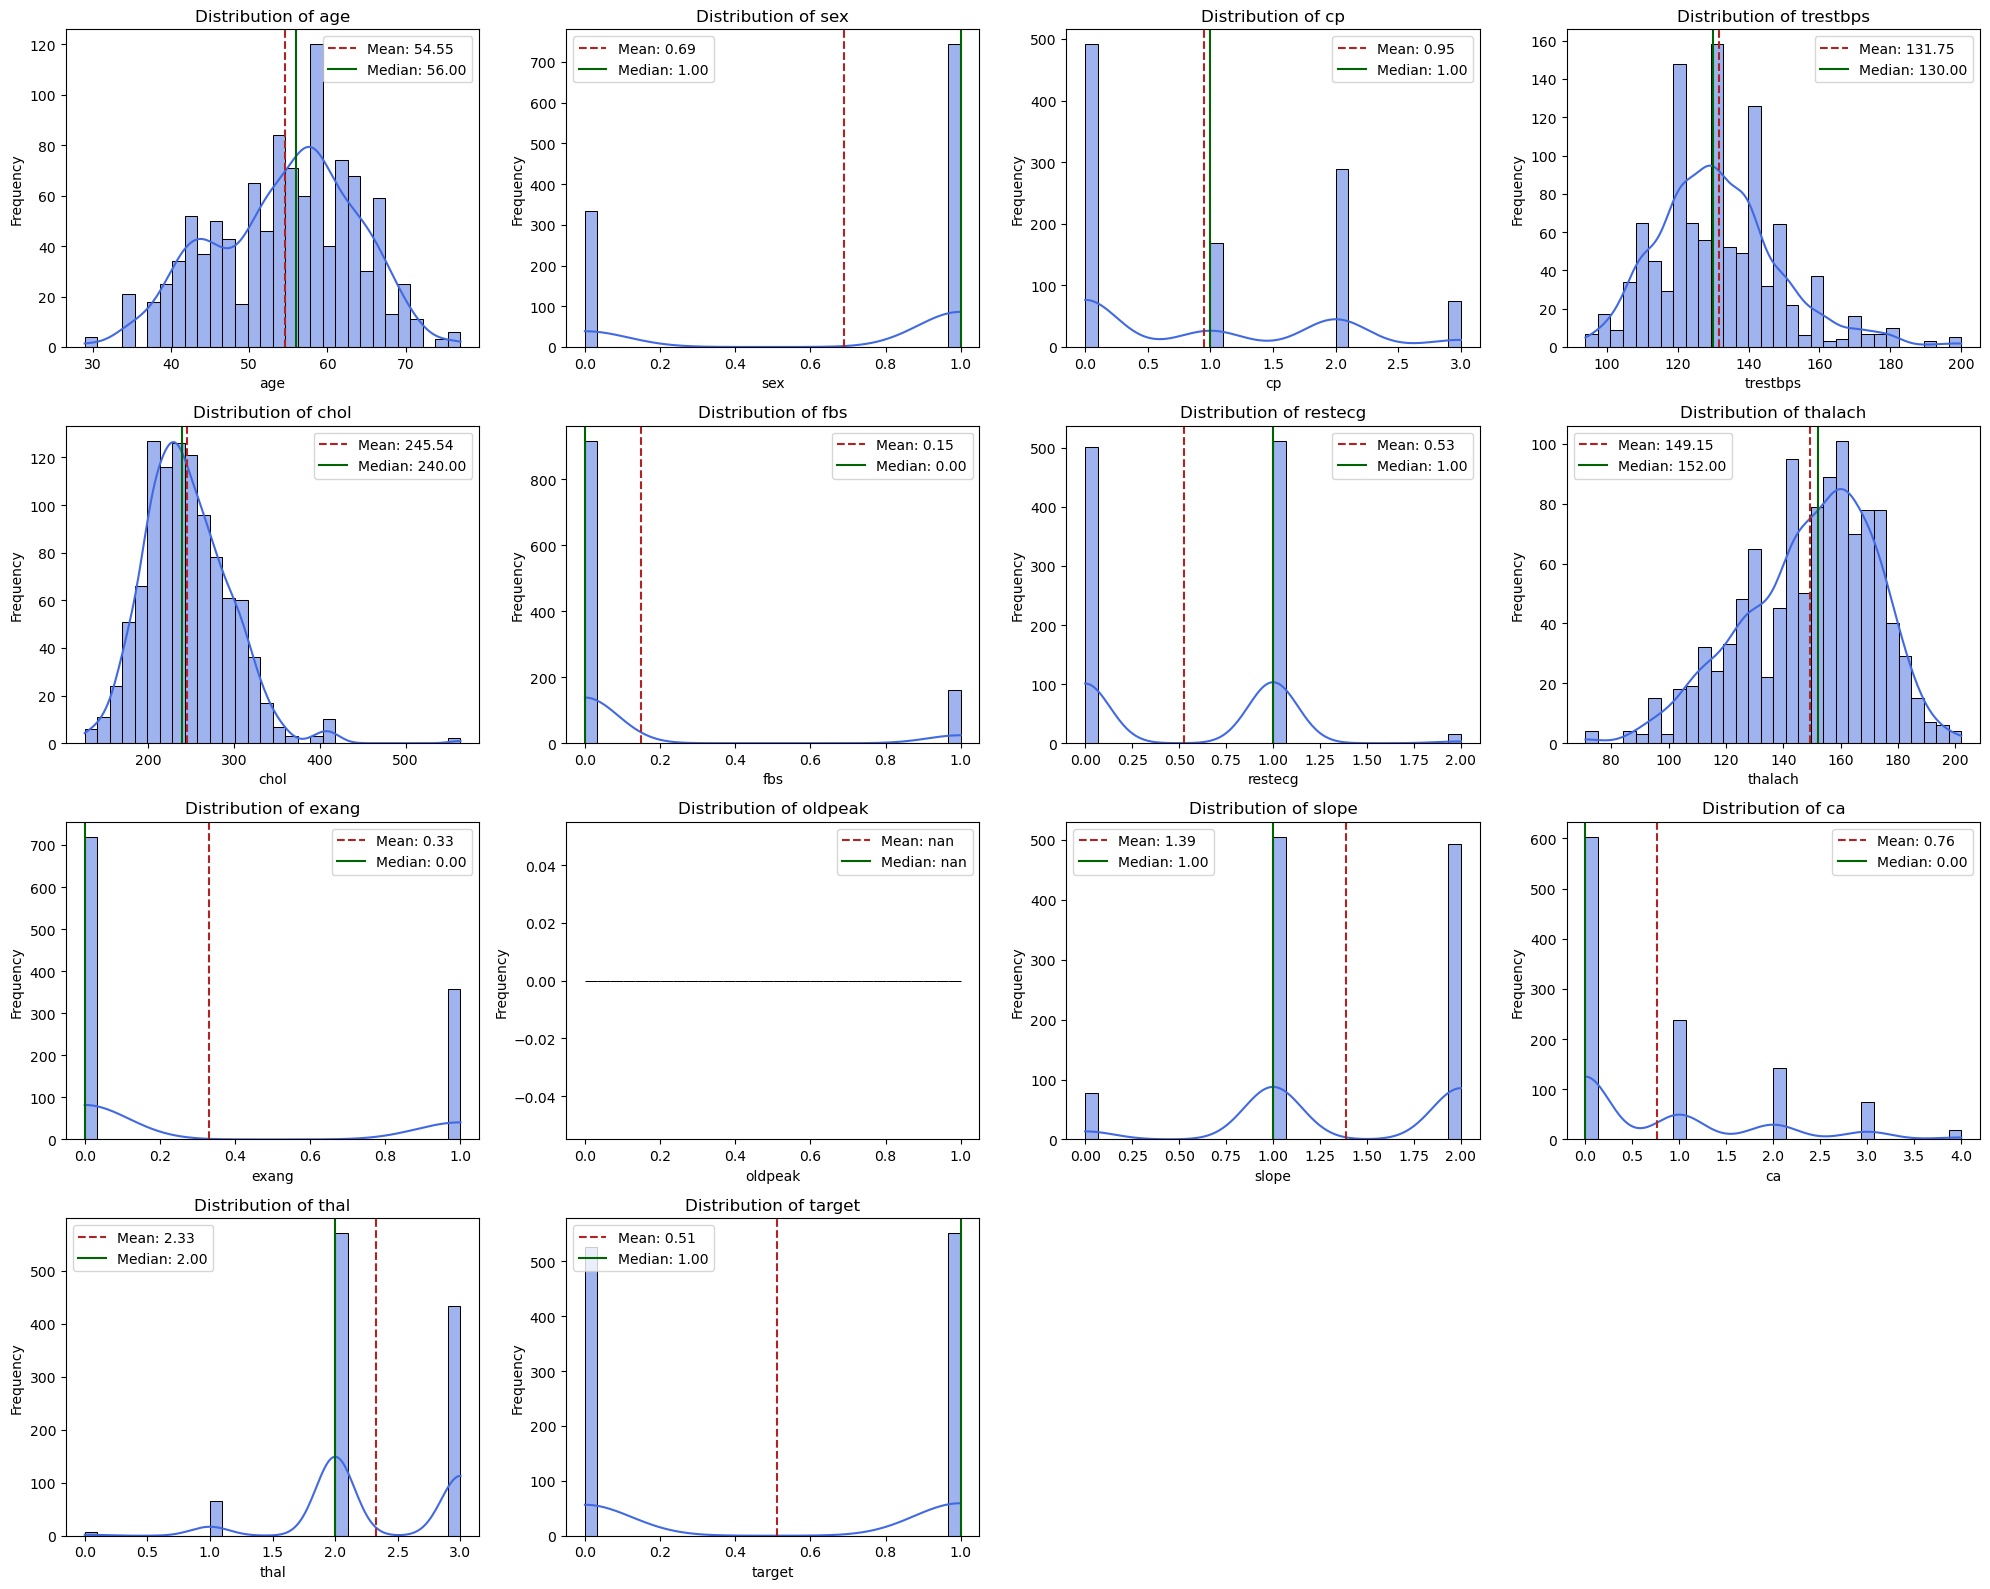

In [16]:
plot_distributions(heart_disease)

#####  The Distribution Behind Heart Disease

At the heart of this analysis, the numbers reveal a complex health story, where age, blood pressure, cholesterol, heart rate, and other indicators intersect to paint a clear picture of risks and opportunities.

- **Age:**  
  Patients are distributed across various ages, but the majority are concentrated in their 50s and 60s. This concentration reflects that heart diseases often begin to appear with age, as risk factors accumulate and blood vessels become more fragile.

- **Resting Blood Pressure (trestbps):**  
  Values mostly range between 120 and 140, with some higher readings indicating cases of chronic hypertension. This pattern highlights the importance of monitoring blood pressure as a key factor in heart health.

- **Cholesterol (chol):**  
  The distribution shows a clear skew towards higher values, with some cases having very high cholesterol. This variation reflects differences in dietary habits and physical activity levels among patients.

- **Maximum Heart Rate Achieved (thalach):**  
  Most values are between 140 and 170 beats per minute, indicating that most patients can reach good heart rates during exertion. However, some lower values may indicate fitness issues or advanced heart disease.

- **ST Depression (oldpeak):**  
  Most values are close to zero, with some cases experiencing significant drops, which may indicate myocardial ischemia during stress.

- **Number of Major Vessels Colored (ca):**  
  The vast majority of patients have 0 or 1 affected vessel, while severe cases are rare, reflecting that most of the sample is in early or moderate stages of the disease.

- **Chest Pain Type (cp):**  
  One or two types of chest pain are most common, which may help doctors link symptoms to diagnosis.

- **Thalium Stress Test Result (thal):**  
  The distribution is uneven, with concentration in certain results, which may indicate that some patterns are more associated with the presence of disease.

- **Target (target):**  
  The distribution is almost balanced between the presence and absence of disease, providing a good base for building an accurate classification model.

---

Each column here tells part of the patient's story.

##### Correlation

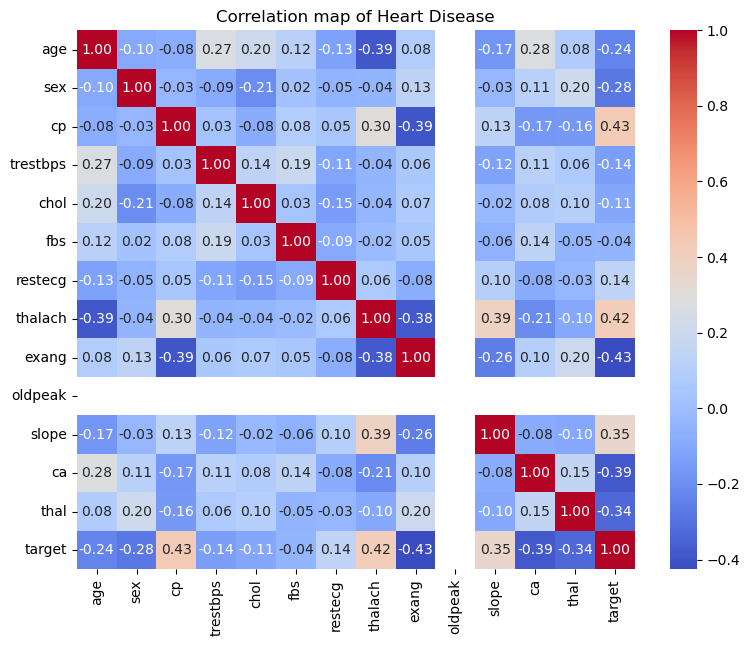

In [17]:
plt.figure(figsize=(9,7))
corr=heart_disease.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation map of Heart Disease')
plt.show()

##### Notes on the Correlation Matrix

- There is a strong positive correlation between **cp (chest pain type)** and **target**, indicating that certain types of chest pain are highly associated with heart disease.
- **thalach (maximum heart rate achieved)** shows a moderate positive correlation with **target**, suggesting that patients with higher maximum heart rates are less likely to have heart disease.
- **oldpeak** and **exang (exercise induced angina)** have a negative correlation with **target**, meaning higher values in these features are linked to a higher chance of heart disease.
- **age** and **trestbps (resting blood pressure)** have weak correlations with **target**, indicating limited direct influence.
- Some features, such as **ca** and **thal**, also show notable correlations with the target and with each other, which may be important for model building.
- Most other features have low or no correlation, which is common in medical datasets.

> These correlations help identify which features are most relevant for predicting heart disease and can guide feature selection for machine learning models.

#### Features and Target Analysis

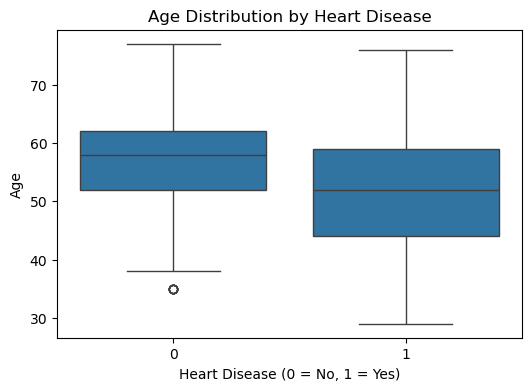

In [18]:
# age analysis
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='age', data=heart_disease)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

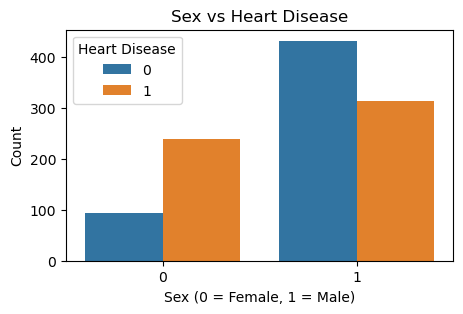

In [19]:
plt.figure(figsize=(5,3))
sns.countplot(x='sex', hue='target', data=heart_disease)
plt.title('Sex vs Heart Disease')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

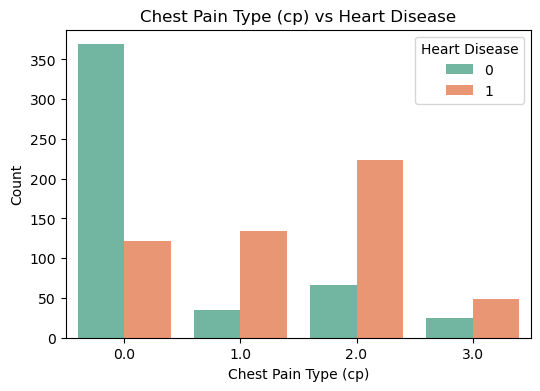

In [20]:
# chest pain type analysis
plt.figure(figsize=(6,4))
sns.countplot(x='cp', hue='target', data=heart_disease, palette='Set2')
plt.title('Chest Pain Type (cp) vs Heart Disease')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

#### Chest Pain Type (cp) Description

The **cp** feature represents the type of chest pain experienced by the patient. It is a categorical variable with the following values:

- **0: Typical angina**  
  Classic chest pain related to decreased blood supply to the heart, usually triggered by physical activity or stress and relieved by rest or medication.

- **1: Atypical angina**  
  Chest pain that does not follow the typical pattern of angina. It may occur at rest, last longer, or not be relieved by rest or medication.

- **2: Non-anginal pain**  
  Chest pain that is not related to heart problems. It may be caused by issues such as muscle strain, acid reflux, or anxiety.

- **3: Asymptomatic**  
  The patient does not experience any chest pain or related symptoms.

C:\Users\MSI\AppData\Local\Temp\ipykernel_14320\2625810069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='target', y='thalach', data=heart_disease, palette=['royalblue', 'skyblue'])
c:\Users\MSI\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\MSI\anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


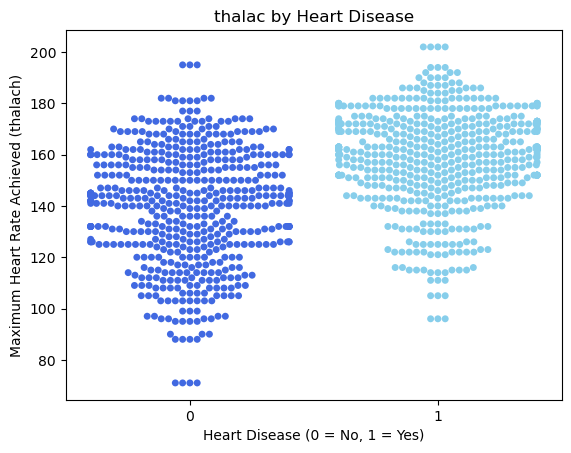

In [21]:
# thalach analysis
sns.swarmplot(x='target', y='thalach', data=heart_disease, palette=['royalblue', 'skyblue'])
plt.title('thalac by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.show()

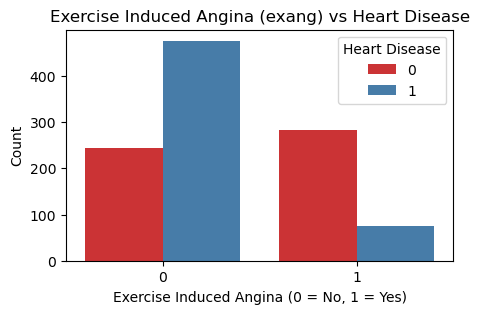

In [22]:
# exang (Exercise Induced Angina) analysis
plt.figure(figsize=(5,3))
sns.countplot(x='exang', hue='target', data=heart_disease, palette='Set1')
plt.title('Exercise Induced Angina (exang) vs Heart Disease')
plt.xlabel('Exercise Induced Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

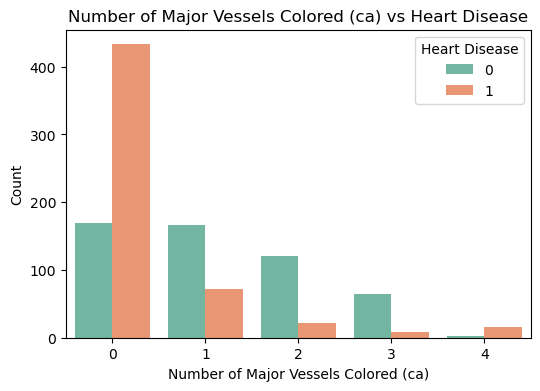

In [23]:
# ca (Number of Major Vessels Colored) analysis
plt.figure(figsize=(6,4))
sns.countplot(x='ca', hue='target', data=heart_disease, palette='Set2')
plt.title('Number of Major Vessels Colored (ca) vs Heart Disease')
plt.xlabel('Number of Major Vessels Colored (ca)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

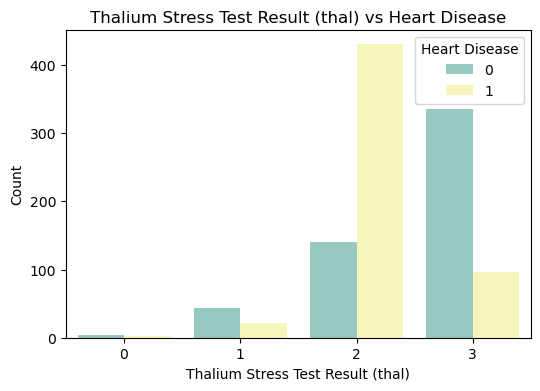

In [24]:
# thal (Thalium Stress Test Result) analysis
plt.figure(figsize=(6,4))
sns.countplot(x='thal', hue='target', data=heart_disease, palette='Set3')
plt.title('Thalium Stress Test Result (thal) vs Heart Disease')
plt.xlabel('Thalium Stress Test Result (thal)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

##### exang & ca & thal:

- **exang (Exercise Induced Angina):**  
  People who get angina (chest pain) during exercise (exang=1) are more likely to have heart disease.

- **ca (Number of Major Vessels Colored):**  
  The more major blood vessels affected (higher ca), the higher the chance of heart disease.

- **thal (Thalium Stress Test Result):**  
  Abnormal thal results are seen more in people with heart disease, while normal results are more common in healthy people.

### Missing Values with KNNImputer

In [25]:
heart_disease.dtypes

age           int64
sex           int64
cp          float64
trestbps      int64
chol        float64
fbs           int64
restecg     float64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [26]:
heart_disease.isnull().sum()

age            0
sex            0
cp            53
trestbps       0
chol          55
fbs            0
restecg       48
thalach        0
exang          0
oldpeak     1076
slope          0
ca             0
thal           0
target         0
dtype: int64

In [27]:
heart_disease.drop('oldpeak', axis=1, inplace=True)

In [28]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler 

scaler=StandardScaler()
heart_disease_scaled=scaler.fit_transform(heart_disease)

impute=KNNImputer(n_neighbors=5)
heart_disease_imputed=impute.fit_transform(heart_disease_scaled)
heart_disease = pd.DataFrame(scaler.inverse_transform(heart_disease_imputed), columns=heart_disease.columns)


heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Feature Engineering

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


#split data
x=heart_disease.drop('target', axis=1)
y=heart_disease['target']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

#normalize data
norm=Normalizer()
x_train_norm=norm.fit_transform(x_train)
x_test_norm=norm.transform(x_test)

#standardize data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_norm)
x_test_scaled=scaler.transform(x_test_norm)

#Feature selection
rf=RandomForestClassifier(n_jobs=-1 ,class_weight='balanced', random_state=42,max_depth=5)
rf.fit(x_train,y_train)

# Define the feature selector
model=SelectFromModel(rf,prefit=True)
feature_bool=model.get_support()
features=x.columns[feature_bool]

print("Selected Features: is {}".format(features))

Selected Features: is Index(['cp', 'thalach', 'ca', 'thal'], dtype='object')


## Training Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  balanced_accuracy_score
logistic_model=LogisticRegression(max_iter=200, C=0.1)
logistic_model.fit(x_train[features], y_train)
logistic_model.predict(x_test[features])

#balance accuracy score 
y_pred=logistic_model.predict(x_test[features])
bal_accuracy = balanced_accuracy_score(y_test, y_pred) 
print(f"Balanced Accuracy:{bal_accuracy:.2f}")

Balanced Accuracy:0.81


## MLFlow

2025/06/08 19:09:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run dashing-crab-472 at: http://127.0.0.1:5000/#/experiments/517009195102588132/runs/3e1714068ca74124b7066394605314b0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/517009195102588132
{'learning_rate': '0.01', 'n_estimators': '100', 'solver': 'lbfgs'}
{'accuracy': 0.8055555555555556, 'f1_score': 0.8141592920353983, 'precision': 0.7796610169491526, 'recall': 0.8518518518518519}


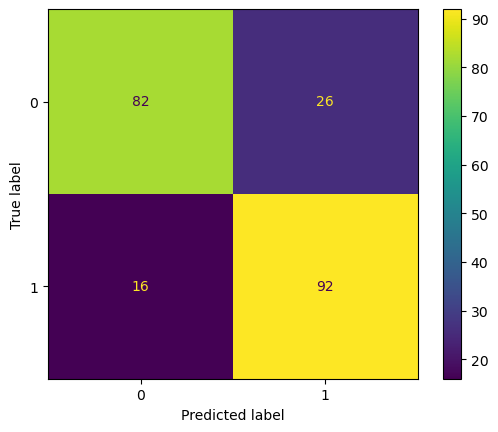

In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")

accuracy= accuracy_score(y_test, y_pred)
 
# Set an experiment name
mlflow.set_experiment("Heart Disease Classification") 

if mlflow.active_run():
    mlflow.end_run()

# Start a new run in this experiment
with mlflow.start_run()as run:
    mlflow.log_param('solver', logistic_model.solver)
    mlflow.log_param("learning_rate", 0.01)
    # Log metrics 
    mlflow.log_metric('accuracy',accuracy)
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred))
    mlflow.log_metric("precision", precision_score(y_test, y_pred))
    mlflow.log_metric("recall", recall_score(y_test, y_pred))
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("learning_rate", 0.01)
    mlflow.sklearn.log_model(logistic_model, "model")

#confusion_matrix   
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig("confusion_matrix.png")
mlflow.log_artifact("confusion_matrix.png") 
 
# Fetch the run data and print params 
run_id = run.info.run_id
run_data = mlflow.get_run(run_id) 
print(run_data.data.params) 
print(run_data.data.metrics) 

# Search all runs in experiment 
exp_id = run_data.info.experiment_id 
runs_df = mlflow.search_runs(exp_id)



### Visualize

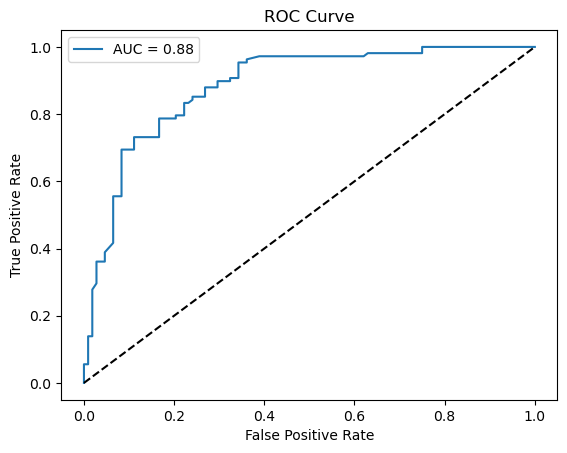

In [33]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = logistic_model.predict_proba(x_test[features])[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
